Lab 8: Analysis Guidelines 
---

:::{note}
These guidelines were prepared by **Moise Baraka** (TA - Fluid Mechanics Lab), November 2024
:::

---

$$
\require{xcolor}
$$

## Part I: Flow across a weir

In the first part of the experiment, you will compare the flow rate measured across the weir with the flow rate obtained from the apparatus. Note that **Manning's equation is not required for this part**.

- **How do you read the flow rate from the apparatus?**



The flow rate from the manometer is calculated using the formula:
$$
\log_{10}(Q) = \frac{\log_{10}(\Delta H) -1.47}{2.096} \implies \boxed{\textcolor{blue}{Q_m = 10^{\frac{\log_{10}(\Delta H) -1.47}{2.096}} ,\quad (cfs)}}
$$

Where $\Delta H \, (ft)$ is the difference between the readings of the two manometers: $\Delta H = H_1-H_2$

- **Flow across the V-notch weir:**

The flow rate across the V-notch weir is determined using the following equation:
$$
Q_{w} = \frac{8}{15} \sqrt{2g}\, C_e \tan\left(\frac{\theta}{2}\right) \, (h+k)^{5/2}
$$

Here, $C_e$ is a coefficient based on the angle $\theta$ of the weir in degrees. $k$ is the head correction coefficient. The values for $C_e$ and $k$ are functions of the angle $\theta$ of the V-notch weir:
$$
C_e = 0.6072 - 0.0008745\cdot \theta + 0.000006104 \cdot \theta^2
$$

$$
k = \frac{0.002}{\sin\left(\frac{\theta}{2}\right)}, \quad (\text{for } \, 40^\circ \leq \theta \leq 90^\circ ), \quad (ft)
$$

Since the angle of our V-notch weir is $90^\circ$, we say:

$$
\boxed{\textcolor{blue}{Q_{w} = \frac{8}{15} \sqrt{2g}\, C_e \, (h+k)^{5/2},\quad C_e = 0.578, \quad \text{and } k = 0.862\,mm\,(0.00283\,ft)}}
$$

**Note:** You will have to plot two curves on the same figure:

(1) $\log(Q_m) (h)$: manometer flow rates vs weir water heights
    
(2) $\log(Q_w) (h)$: weir flow rates vs weir water heights.


## Part 2: Channel roughness

In the second part of the experiment, you will estimate the channel roughness coefficient $n$. To do so, 

- Calculate flow rates using the equation from Part I based on the manometer readings:

$\log_{10}(Q) = \frac{\log_{10}(\Delta H) -1.47}{2.096}$
- Then, compute the wetted perimeter $P$, the area $A$, and the hydraulic radius $R=\frac{A}{P}$ from the measured $h$ and the channel width $B$.

Knowing the flow rate $Q$, the bed slope $S_0$, and other calculated dimensions above, **use Manning's equation** to solve for $n$.
$$
Q=\frac{K_n}{n} \cdot A \cdot R^{2/3} \cdot S_0 \implies \boxed{{n = \frac{K_n}{Q} \cdot A \cdot R^{2/3} \cdot S_0}}
$$

Here, $K_n$ is a unit conversion quantity. Take $K_n=1.0$ if using S.I units or $K_n=1.49$ for US customary units.


**Remark:** 

To verify your results, rewrite Manning's equation as a linear relationship and then plot it. To do this, we pose $Y=Q$ and $x=K_n \cdot A \cdot R^{2/3} \cdot S_0$, then Manning's equation can be written as a linear equation of the form:

$$
\boxed{\textcolor{red}{Y = \frac{1}{n} x}}
$$

- Use the data you gathered in part II, regardless of the slopes, and plot $Q$ versus $x=K_n \cdot A \cdot R^{2/3} \cdot S_0$.
- Compare the slope of the plotted curve with the $\frac{1}{n}$ to critique and validate your estimated mean roughness coefficient.

### References

[(1) Discharge Characteristics of Triangular-notch Thin-plate Weirs](https://pubs.usgs.gov/wsp/1617b/report.pdf)

[(2) Open Channel Flow: Instructor Notebook - Dr. Cleveland](http://54.243.252.9/ce-3105-webroot/ce3105notes/_build/html/lessons/laboratory8/laboratory8.html)

### Practical Example

In [1]:
#-------------------------------------
#             SCRIPTS
#-------------------------------------

import numpy as np
import math


g = 32.2    # ft/s2
k = 0.00283 # ft
Ce = 0.578  # discharge coefficient

h = [64.32, 76.10, 81.38, 85.28, 95.25]  # mm (weir heights)
h = [i*0.00328084 for i in h]            # ft
#print(h)

# Manometer reading
H_1 = [2.3, 2.43, 2.47, 2.53, 2.75] # ft
H_2 = [2.1, 1.93, 1.84, 1.75, 1.37]

# Denivelation from the manometer
delta_h = [i-j for i,j in zip(H_1, H_2)] #H_1-H_2

# Compute flow rates from the manometers
Qm = 10**((np.log10(delta_h) -1.47) / 2.096)

# Flow across the weir
Qw = [8/15 * math.sqrt(2*g) * Ce * (i+k)**2.5 for i in h]

# print Qm
print("- The flow across the manometers Qm=", np.round(Qm, 4), "cfs")
print("- The flow across the weir Qw=", np.round(Qw, 4), "cfs")


- The flow across the manometers Qm= [0.0923 0.1429 0.1596 0.1767 0.232 ] cfs
- The flow across the weir Qw= [0.0523 0.0793 0.0936 0.105  0.1381] cfs


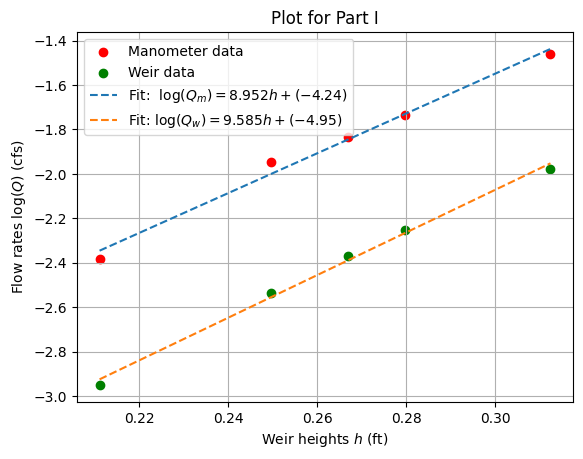

In [2]:
import matplotlib.pyplot as plt

# regression
x = h
ym = np.log(Qm)
yw = np.log(Qw)

mm, bm = np.polyfit(x, ym, 1)  # manometers
mw, bw = np.polyfit(x, yw, 1)  # weir

# Let us plot log(Qm)(h), log(Qw)(h)
plt.scatter(h, np.log(Qm), label="Manometer data ", color="red")
plt.scatter(h, np.log(Qw), label="Weir data ", color="green")
plt.plot(x, [mm*i+bm for i in x], "--", label=f'Fit:  $\\log(Q_m)={mm:.3f}h+({bm:.2f})$')
plt.plot(x, [mw*i+bw for i in x], "--", label=f'Fit: $\\log(Q_w)={mw:.3f}h+({bw:.2f})$')
plt.title("Plot for Part I")
plt.xlabel("Weir heights $h$ (ft)")
plt.ylabel("Flow rates $\\log(Q)$ (cfs)")
plt.legend()
plt.grid(True)
plt.show()



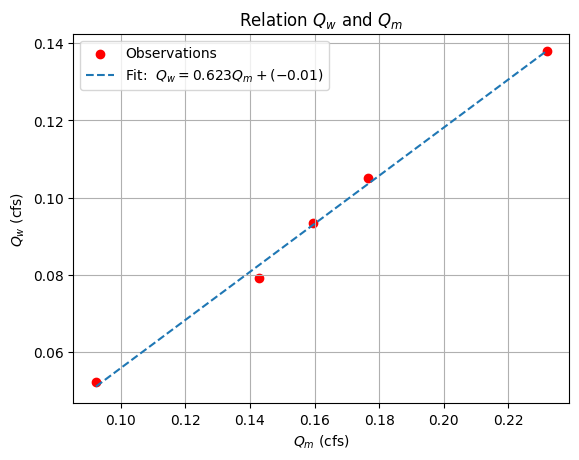

In [3]:

# Let us fit a linear regression that predicts Qw based on Qm
x = Qm
y = Qw

# Regression of degree 1
m, b = np.polyfit(x, y, 1)  # manometers

# plots
plt.scatter(Qm, Qw, label="Observations", color="red")
plt.plot(x, [m*i+b for i in x], "--", label=f'Fit:  $Q_w={m:.3f}Q_m+({b:.2f})$')
plt.title("Relation $Q_w$ and $Q_m$")
plt.xlabel("$Q_m$ (cfs)")
plt.ylabel("$Q_w$ (cfs)")
plt.legend()
plt.grid(True)
plt.show()


**Note:**

As established from the linear regression, the relationship between the flow rate over the weir $Q_w$ and the upstream flow rate from the manometer readings $(Q_m)$ is given by:
$$
Q_w = 0.623 Q_m -0.01,
$$

This relationship allows us to estimate the flow reaching the rocky-bed region under experimental conditions where the weir is present. The estimated $Q_w$ can then be used to calculate Manning’s coefficient $n$ for the rocky-bed region. 

In the absence of the weir, the total upstream flow $Q_m$ would directly enter the rocky-bed region, as there would be no division or obstruction caused by the weir. In this case, Manning’s coefficient will be estimated using this direct flow value.
